In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
iris = pd.read_csv('data/iris.csv')
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


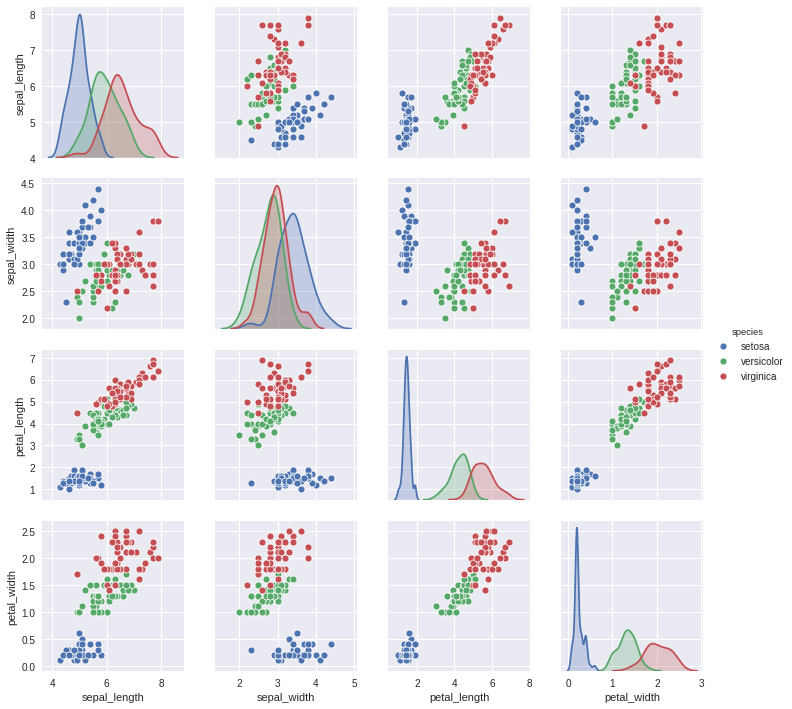

In [3]:
plt.style.use('seaborn')
sns.pairplot(iris, hue='species')

In [4]:
wh = pd.read_csv('data/weight-height.csv')
wh.mean()

Height     66.367560
Weight    161.440357
dtype: float64

In [79]:
from scipy.stats import norm, multinomial
class gaussian:
    #self.model = norm
    'Ajusta una curva gaussiana, obtiene los parámetros y evalua según los parámetros obtenidos'
    def __init__(self, m=0, s=1):
        self.m = m
        self.std = s
    
    def fit(self, x):
        'Ajuste de curva'
        self.m, self.std = norm.fit(x)
    def pdf(self, x):
        'Predice probabilidad'
        return norm.pdf(x, loc=self.m, scale=self.std)

    
class multi:
    "Ajusta una distribucion multinomial, obtiene los parámetros y evalua"
    
    def __init__(self, dim=3):
        self.dim = dim
        self.p = np.ones(self.dim)/self.dim
        self.nums = np.arange(self.dim)
    
    def fit(self, x):
        nums = np.shape(x)[1]
        pp = np.sum(x, axis=0)
        self.p = pp/np.sum(pp)
        #self.p = self.p/np.sum(self.p)
    
    def pdf(self, x):
        rv = multinomial(1, self.p)
        return rv.pmf(x)
        

In [51]:
from sklearn.preprocessing import OneHotEncoder
x = np.array([0,0,0,1,1,2,2,2,2])
enc = OneHotEncoder().fit(x.reshape(-1,1))
encoded = enc.transform(x.reshape(-1,1))
print(encoded.toarray())

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [6]:
hombres = wh[wh['Gender']=='Male']
mujeres = wh[wh['Gender']!='Male']

In [7]:
# Hombres
peso_h = gaussian()
peso_h.fit(hombres.Weight)
altura_h = gaussian()
altura_h.fit(hombres.Height)

#Mujeres
peso_m = gaussian()
peso_m.fit(mujeres.Weight)
altura_m = gaussian()
altura_m.fit(mujeres.Height)

p_peso =  gaussian()
p_peso.fit(wh.Weight)
p_altura =  gaussian()
p_altura.fit(wh.Height)

wh.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [8]:
peso = 212
altura = 74

p_hombre = 0.5 * peso_h.pdf(peso) * altura_h.pdf(altura) / (p_peso.pdf(peso) * p_altura.pdf(altura))
p_mujer = 0.5 * peso_m.pdf(peso) * altura_h.pdf(altura) / (p_peso.pdf(peso) * p_altura.pdf(altura))
print('Probabilidad de ser hombre: ', p_hombre)
print('Probabilidad de ser mujer: ', p_mujer)

Probabilidad de ser hombre:  2.686097448609596
Probabilidad de ser mujer:  0.0020550515131744678


In [9]:
p = np.zeros((2, len(wh)))
p[0] = 0.5* peso_h.pdf(wh.Weight) * altura_h.pdf(wh.Height) 
p[1] = 0.5 * peso_m.pdf(wh.Weight) * altura_m.pdf(wh.Height)
p = p / np.sum(p, axis=0)

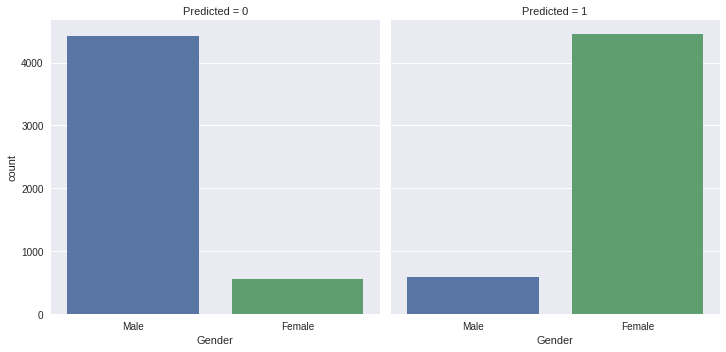

In [10]:
wh['Predicted'] = np.argmax(p, axis=0)
sns.catplot(x='Gender', col='Predicted', 
            data=wh, kind='count')

In [136]:
titanic = pd.read_csv('data/titanic-train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [144]:
# Encoding
titanic_enc = pd.get_dummies(titanic, columns=['Pclass', 'Sex'])
titanic_enc = titanic_enc[np.isfinite(titanic_enc['Age'])]
# Subsets
viven = titanic_enc[titanic_enc['Survived']==1]
mueren = titanic_enc[titanic_enc['Survived']!=1]

titanic_enc.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,0,1,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


In [146]:
# Ajuste de probabilidades
p_sx_v = multi()
p_sx_v.fit(viven.loc[:, ['Sex_male', 'Sex_female']])
print('Probabilida del genero dado que viven: \n', p_sx_v.p)

p_sx_m = multi()
p_sx_m.fit(mueren.loc[:, ['Sex_male', 'Sex_female']])
print('Probabilida del genero dado que mueren: \n', p_sx_m.p)

p_class_v = multi()
p_class_v.fit(viven.loc[:, ['Pclass_1', 'Pclass_2', 'Pclass_3']])
print('Probabilida de la clase dado que viven: \n', p_class_v.p)

p_class_m = multi()
p_class_m.fit(mueren.loc[:, ['Pclass_1', 'Pclass_2', 'Pclass_3']])
print('Probabilida de la clase dado que mueren: \n', p_class_m.p)

p_fare_v = gaussian()
p_fare_v.fit(viven.Fare)
print('Promedio del precio boleto dado que viven: ', p_fare_v.m)

p_fare_m = gaussian()
p_fare_m.fit(mueren.Fare)
print('Promedio del precio boleto dado que mueren: ', p_fare_m.m)

p_age_v = gaussian()
p_age_v.fit(viven.Age)
print('Promedio de edad dado que viven: ', p_age_v.m)

p_age_m = gaussian()
p_age_m.fit(mueren.Age)
print('Promedio de edad dado que viven: ', p_age_m.m)

Probabilida del genero dado que viven: 
 Sex_male      0.32069
Sex_female    0.67931
dtype: float64
Probabilida del genero dado que mueren: 
 Sex_male      0.849057
Sex_female    0.150943
dtype: float64
Probabilida de la clase dado que viven: 
 Pclass_1    0.420690
Pclass_2    0.286207
Pclass_3    0.293103
dtype: float64
Probabilida de la clase dado que mueren: 
 Pclass_1    0.150943
Pclass_2    0.212264
Pclass_3    0.636792
dtype: float64
Promedio del precio boleto dado que viven:  51.843205172413796
Promedio del precio boleto dado que mueren:  22.96545636792453
Promedio de edad dado que viven:  28.343689655172415
Promedio de edad dado que viven:  30.62617924528302


In [244]:
#p1 = p_class_v.pdf([1, 0, 0]) * p_sx_v.pdf([0, 1]) 
#p2 = p_class_v.pdf([1, 0, 0]) * p_sx_v.pdf([0, 1])
p_age_m.pdf(30)

0.028155508722715588

In [141]:
np.sum(titanic_enc.loc[:, ['Sex_male', 'Sex_female']])

Sex_male      577
Sex_female    314
dtype: int64

In [233]:
supervivencia = np.zeros((2, len(titanic_enc)))
supervivencia[1] = len(viven)/len(titanic_enc)  * p_fare_v.pdf(titanic_enc.Fare) \
    * p_sx_v.pdf(titanic_enc.loc[:, ['Sex_male', 'Sex_female']]) \
    * p_age_v.pdf(titanic_enc.Age) \
    * p_class_v.pdf(titanic_enc.loc[:, ['Pclass_1', 'Pclass_2', 'Pclass_3']]) 
    

supervivencia[0] = len(mueren)/len(titanic_enc)  * p_fare_m.pdf(titanic_enc.Fare) \
    * p_sx_m.pdf(titanic_enc.loc[:, ['Sex_male', 'Sex_female']]) \
    * p_age_m.pdf(titanic_enc.Age) \
    * p_class_m.pdf(titanic_enc.loc[:, ['Pclass_1', 'Pclass_2', 'Pclass_3']]) 
    

supervivencia = supervivencia/np.sum(supervivencia, axis=0)

(array([331.,  54.,  22.,  88.,  27.,  38.,  42.,  18.,  17.,  77.]),
 array([0.03925594, 0.13533034, 0.23140475, 0.32747916, 0.42355356,
        0.51962797, 0.61570237, 0.71177678, 0.80785119, 0.90392559,
        1.        ]),
 <a list of 10 Patch objects>)

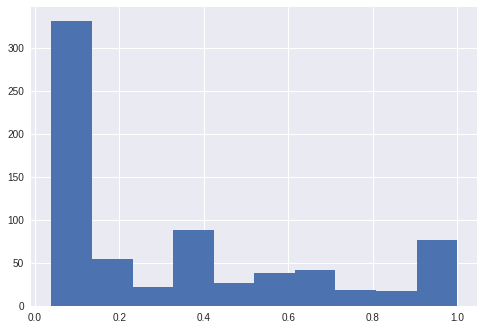

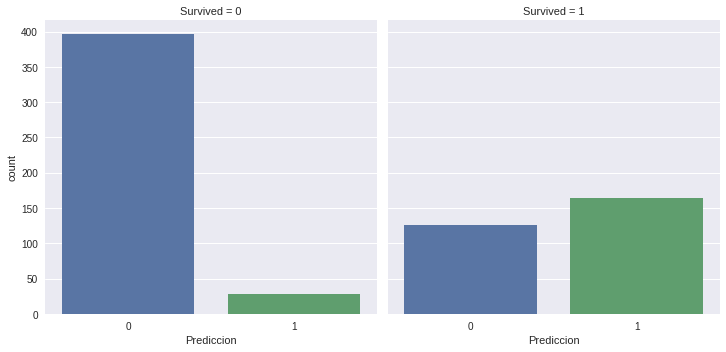

In [274]:
titanic_enc['Prediccion'] = np.argmax(supervivencia, axis=0)
#titanic_enc['Prediccion'] = supervivencia[1]>0.5
sns.catplot(x='Prediccion', col='Survived', 
            data=titanic_enc, kind='count')

In [275]:
np.sum(titanic_enc.Prediccion==titanic_enc.Survived) / len(titanic_enc)

0.7843137254901961

In [221]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(10, input_shape=(7,), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                80        
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 11        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [202]:
model.fit(titanic_enc.loc[:, ['Sex_male', 'Sex_female', 'Age',
                              'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3']],
          y=titanic_enc.Survived, epochs=30)

Epoch 1/30
714/714 [==============================] - 0s 238us/step - loss: 0.4825 - acc: 0.7941
Epoch 2/30
714/714 [==============================] - 0s 492us/step - loss: 0.4305 - acc: 0.8151
Epoch 3/30
714/714 [==============================] - 0s 387us/step - loss: 0.4296 - acc: 0.8235
Epoch 4/30
714/714 [==============================] - 0s 507us/step - loss: 0.4251 - acc: 0.8235
Epoch 5/30
714/714 [==============================] - 0s 510us/step - loss: 0.4415 - acc: 0.8095
Epoch 6/30
714/714 [==============================] - 0s 463us/step - loss: 0.4474 - acc: 0.8081
Epoch 7/30
714/714 [==============================] - 0s 282us/step - loss: 0.4334 - acc: 0.8207
Epoch 8/30
714/714 [==============================] - 0s 366us/step - loss: 0.4325 - acc: 0.8263
Epoch 9/30
714/714 [==============================] - 0s 549us/step - loss: 0.4402 - acc: 0.8067
Epoch 10/30
714/714 [==============================] - 0s 355us/step - loss: 0.4289 - acc: 0.8235
Epoch 11/30
714/714 [========

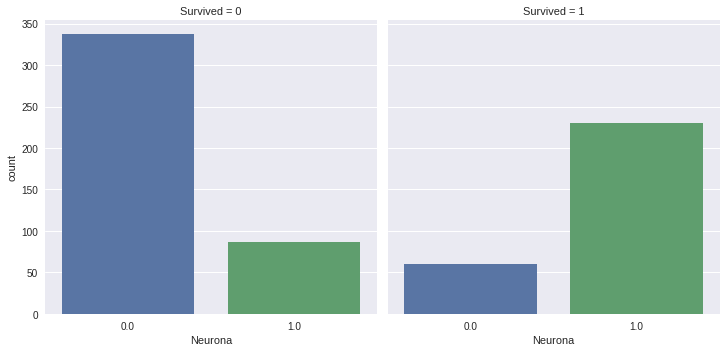

In [207]:
pred = model.predict(titanic_enc.loc[:, ['Sex_male', 'Sex_female', 'Age',
                              'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3']])
pre = np.squeeze(np.round(pred))
titanic_enc['Neurona'] = pre
sns.catplot(x='Neurona', col='Survived', 
            data=titanic_enc, kind='count')

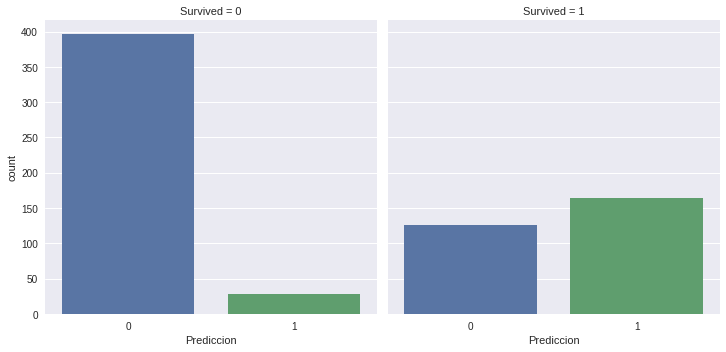

In [216]:
sns.catplot(x='Prediccion', col='Survived', 
            data=titanic_enc, kind='count')

In [211]:
from sklearn.metrics import classification_report
print(classification_report(titanic_enc.Survived, titanic_enc.Prediccion))

             precision    recall  f1-score   support

          0       0.76      0.93      0.84       424
          1       0.85      0.57      0.68       290

avg / total       0.80      0.78      0.77       714



In [212]:
print(classification_report(titanic_enc.Survived, titanic_enc.Neurona))

             precision    recall  f1-score   support

          0       0.85      0.79      0.82       424
          1       0.73      0.79      0.76       290

avg / total       0.80      0.79      0.80       714

